In [10]:
import struct
import numpy as np

def total_trace(filename):
    # TODO: use twin?
    f = open(filename, 'rb')

    # get number of scans to read in
    f.seek(0x5)
    if f.read(4) == 'GC':
        f.seek(0x142)
    else:
        f.seek(0x118)
    nscans = struct.unpack('>H', f.read(2))[0]

    # find the starting location of the data
    f.seek(0x10A)
    f.seek(2 * struct.unpack('>H', f.read(2))[0] - 2)

    tme = np.zeros(nscans)
    tic = np.zeros(nscans)
    for i in range(nscans):
        npos = f.tell() + 2 * struct.unpack('>H', f.read(2))[0]
        tme[i] = struct.unpack('>I', f.read(4))[0] / 60000.
        f.seek(npos - 4)
        tic[i] = struct.unpack('>I', f.read(4))[0]
        f.seek(npos)
    f.close()
    return tic, tme

In [4]:
!ls

Aston.egg-info README.rst     aston          extras         tox.ini
LICENSE.txt    TODO.rst       build          setup.py
MANIFEST.in    Untitled.ipynb dist           test_data


In [7]:
!ls ../data/FA01.D

Audit.txt    FAMES-HA.RES LS_Report    Percent.txt  RESULTS.CSV  cnorm.ini
DATA.MS      FAMES-HA.XLS PRE_POST.INI QReport.txt  acqmeth.txt  fileinfo.txt


In [11]:
tic, tme = total_trace('../data/FA01.D/DATA.ms')

In [12]:
tic

array([ 3576027.,  2654533.,  2052596., ...,   112871.,   111093.,
         106704.])

In [13]:
tme

array([  3.08681667,   3.09253333,   3.09825   , ...,  19.98951667,
        19.99523333,  20.00096667])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

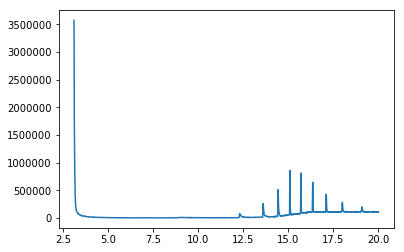

In [29]:
plt.plot(tme, tic)